In [1]:
import geopandas
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import fiona
import shapefile
import metpy.calc as mpcalc
import  descartes
import xarray as xr
import scipy.interpolate 
import salem
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
from shapely.geometry import Polygon
import math
import scipy.signal as signal
import matplotlib.dates as mdate
from scipy import integrate

In [2]:
eva=xr.open_mfdataset('D:\Evaporation data/*')
#pre=xr.open_mfdataset('D:\Precipitation data orgin/*')

In [ ]:
pre.interp(longitude=np.arange(0.5,360,1),latitude=np.arange(-89.5,90.5,1),time=(1,400,2))

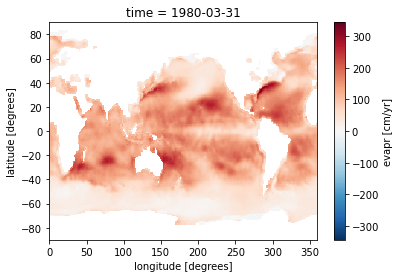

In [3]:
eva = eva.evapr
eva[2,:,:].plot()

In [3]:
pre = pre.interp(longitude=np.arange(0.5,360),latitude=np.arange(-89.5,90.5))
eva = eva.evapr
pre = pre.precip
pre.coords['time'] = pd.date_range('1980-1',freq='1M',periods=468)

In [4]:
pre.coords['lon']=('longitude',pre.longitude)
pre.coords['lat']=('latitude',pre.latitude)
pre=pre.swap_dims({'latitude':'lat','longitude':'lon'})
pre=pre.drop(['longitude','latitude'])

In [5]:
eva.load()

<xarray.DataArray 'evapr' (time: 468, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2018-12-31
Attributes:
    comments:  monthly mean evaporation rate
    units:     cm/yr

In [74]:
eva=eva*10

In [75]:
eva[48:60] = eva[48:60]/366
eva[96:108] = eva[96:108]/366
eva[144:156] = eva[144:156]/366
eva[192:204] = eva[192:204]/366
eva[240:252] = eva[240:252]/366
eva[288:300] = eva[288:300]/366
eva[336:348] = eva[336:348]/366
eva[384:396] = eva[384:396]/366
eva[432:444] = eva[432:444]/366

In [76]:
eva[0:48] = eva[0:48]/365
eva[60:96] = eva[60:96]/365
eva[108:144] = eva[108:144]/365
eva[156:192] = eva[156:192]/365
eva[204:240] = eva[204:240]/365
eva[252:288] = eva[252:288]/365
eva[300:336] = eva[300:336]/365
eva[348:384] = eva[348:384]/365
eva[396:432] = eva[396:432]/365
eva[444:] = eva[444:]/365

In [77]:
fresh = eva-pre

In [61]:
fresh.isel(time=0).plot()

In [82]:
fresh.name = 'epflux'

In [83]:
fresh.to_netcdf('D:\epflux.nc')

In [78]:
ave = fresh.groupby('time.month').mean(dim='time',skipna=True)

In [81]:
ave[1].plot()

C:\Users\10173\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [66]:
fig, ax = plt.subplots(figsize=(14,7))
clevs = np.arange(-10,10,0.05)
cf = ax.contourf(ave.coords['lon'],ave.coords['lat'],ave.isel(month=0),clevs,cmap='RdBu_r', extend='both')
cbar = plt.colorbar(cf,extendrect=True)

C:\Users\10173\anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [68]:
eva[444:]

<xarray.DataArray 'evapr' (time: 24, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2017-01-31 2017-02-28 ... 2018-12-31